In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme() 

In [2]:
elastic_net = pd.read_csv("./metrics/101_elastic_net.csv.zip")
lasso = pd.read_csv("./metrics/101_lasso.csv.zip")
linear_regression = pd.read_csv("./metrics/101_linear_regression.csv.zip")
logistic_regression = pd.read_csv("./metrics/101_logistic_regression.csv.zip")
random_forest = pd.read_csv("./metrics/101_random_forest.csv.zip")
decision_tree = pd.read_csv("./metrics/101_decision_tree.csv.zip")
mlp = pd.read_csv("./metrics/101_mlpr.csv.zip")
xgboost = pd.read_csv("./metrics/101_xgboost.csv.zip")

In [3]:
metrics = pd.concat([elastic_net,lasso,
                     linear_regression,logistic_regression,
                     random_forest,decision_tree,mlp,xgboost])

In [4]:
metrics.sort_values("r2",ascending=False,inplace=True)

In [5]:
metrics

,model,r2,mae,mse,rmse,mape,time_to_fit,time_to_predict
0,Random Forest,0.627779,1.616362,5.172880,2.274397,1.498247e+13,19.457092,0.363596
0,XGBoost,0.559063,1.856184,6.127849,2.475449,4.182086e+13,0.493662,0.019363
0,MLP,0.453022,2.083076,7.601548,2.757090,8.341706e+13,74.893264,0.016055
0,Decision Tree,0.331799,1.769550,9.286216,3.047329,1.292831e+13,0.341238,0.006898
0,Linear Regression,0.256952,2.584297,10.326397,3.213471,1.525508e+14,0.169304,0.008279
0,Elastic Net,0.167499,2.951749,11.569560,3.401406,1.554239e+14,0.087053,0.007023
0,Lasso,0.111382,3.103075,12.349438,3.514177,1.556248e+14,0.185670,0.005160
0,Logistic Regression,-0.495515,2.890862,20.783690,4.558913,1.776445e+14,4.295443,0.007249


In [6]:
metrics.to_csv("./metrics/102_initial_metrics.csv.zip",index=False,compression="zip")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


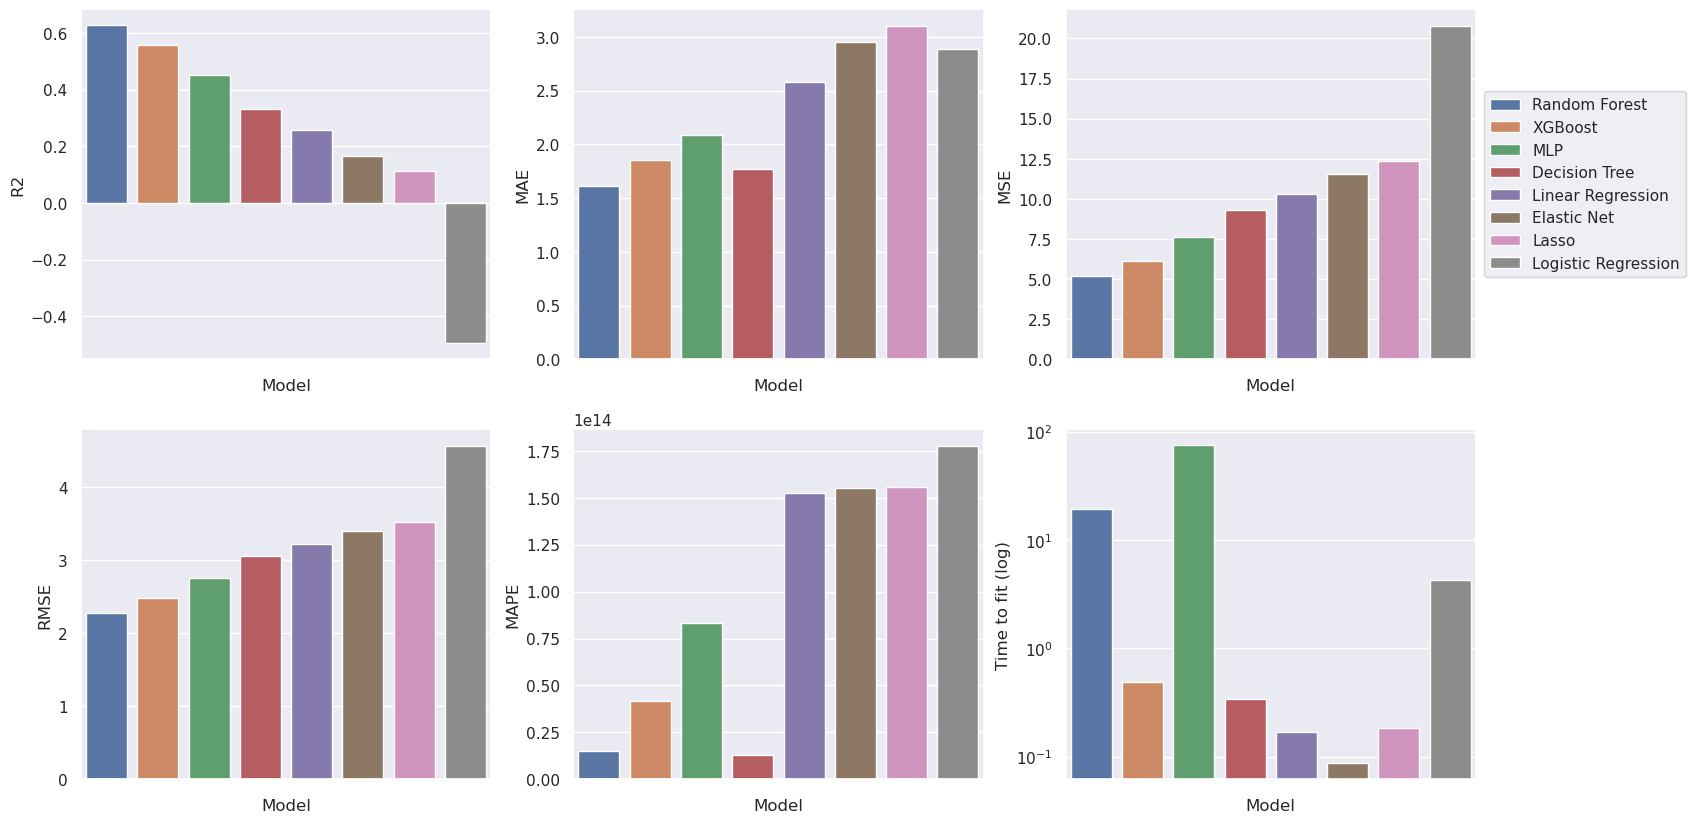

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.barplot(ax=axes[0, 0], data=metrics, x='model', y='r2',hue="model",dodge=False)
sns.barplot(ax=axes[0, 1], data=metrics, x='model', y='mae',hue="model",dodge=False)
sns.barplot(ax=axes[0, 2], data=metrics, x='model', y='mse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 0], data=metrics, x='model', y='rmse',hue="model",dodge=False)
sns.barplot(ax=axes[1, 1], data=metrics, x='model', y='mape',hue="model",dodge=False)
sns.barplot(ax=axes[1, 2], data=metrics, x='model', y='time_to_fit',hue="model",dodge=False)

axes[0, 0].set(xlabel="Model",xticklabels=[])
axes[0, 0].set(ylabel="R2")
axes[0, 0].get_legend().remove()

axes[0, 1].set(xlabel="Model",xticklabels=[])
axes[0, 1].set(ylabel="MAE")
axes[0, 1].get_legend().remove()

axes[0, 2].set(xlabel="Model",xticklabels=[])
axes[0, 2].set(ylabel="MSE")
axes[0, 2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axes[1, 0].set(xlabel="Model",xticklabels=[])
axes[1, 0].set(ylabel="RMSE")
axes[1, 0].get_legend().remove()

axes[1, 1].set(xlabel="Model",xticklabels=[])
axes[1, 1].set(ylabel="MAPE")
axes[1, 1].get_legend().remove()

axes[1, 2].set(xlabel="Model",xticklabels=[])
axes[1, 2].set(ylabel="Time to fit (log)", yscale="log")
axes[1, 2].get_legend().remove()

plt.savefig("./plots/102_yonge_flow_incidents_metrics.eps",format="eps",bbox_inches="tight")
plt.savefig("./plots/102_yonge_flow_incidents_metrics.png",bbox_inches="tight")